In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
from permutations import get_dicts, rho_3new, rho_2new
import qutip as q

In [3]:
def func1(phi,l,lamb,gamma):
    
    part1=(lamb-np.cos(phi))/np.sqrt((lamb-np.cos(phi))**2+(gamma*np.sin(phi))**2)
    
    return part1*np.cos(l*phi)/np.pi

def func2(phi,l,lamb,gamma):
    
    part2=(gamma*(np.sin(phi)))/np.sqrt((lamb-np.cos(phi))**2+(gamma*np.sin(phi))**2)
    
    return -part2*np.sin(l*phi)/np.pi

def gfunc(l,lamb,gamma=1):
    
    integ1=integrate.quad(func1,0,np.pi,args=(l,lamb,gamma))
    integ2=integrate.quad(func2,0,np.pi,args=(l,lamb,gamma))
    
    return integ1[0]-integ2[0]

def g_s(lambdas,gamma=1):

    g={}
    for n in range(-L,L): 
        for l in lambdas:
            g[n,l]=gfunc(n,l,gamma)
    return g

def assign_g(a,b,g,lamb):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return 1j*g[(d-1)//2,lamb]
        elif a%2==0:
            
            return -1j*g[-((d+1)//2),lamb]
    else:
        return 0
    
def assign_g_debug(a,b):
    if a==b:
        return 0
    d=b-a 
    if d%2==1:
        if a%2==1:
            return "ig[{}]".format((d-1)//2)
        elif a%2==0:
            
            return "-ig[{}]".format(-(d+1)//2)
    else:
        return 0

def get_mat(gdic,lam):
    mat = [[None for c in range(1,2*L+1)] for r in range(1,2*L+1)]
    for x in range(1,2*L+1):
        for y in range(1,2*L+1):
            mat[x-1][y-1]=assign_g(x,y,gdic,lam)  
    return np.array(mat)

In [17]:
for gs in [0.2,0.4,0.6]:
    print(np.sqrt(1-gs**2))


0.9797958971132712
0.916515138991168
0.8


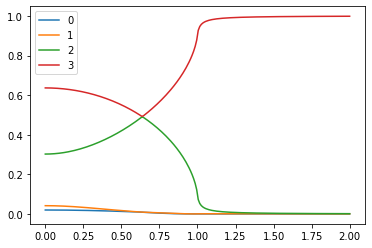

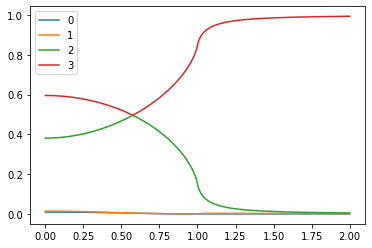

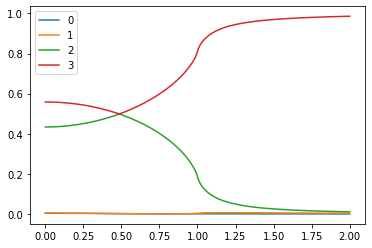

In [52]:
lambdarange=np.linspace(0,2,200)
for gs in [0.2,0.4,0.6]:

    dic,perm=get_dicts()
    rho_dic_theo={}
    for l in lambdarange:
        rho_dic_theo[l]=rho_2new(dic,perm,l,gs)
        
    theovec=np.zeros((len(lambdarange),4))

    for k in range(4):

        for i,el in enumerate(lambdarange):
            theovec[i,k]=eigvalsh(rho_dic_theo[el])[k]
        
            if 0<theovec[i,3]-theovec[i,2]< 1.E-3 :
                print(el)
                print(el**2+gs**2)

    for k in range(4):

        plt.plot(lambdarange,theovec[:,k],label=k)

    plt.legend()
    plt.show()    

In [46]:
def Hamiltonian(lam,gs):
    return -0.5*(((1+gs)/2)*(q.tensor(q.sigmax(),q.sigmax()))+((1-gs)/2)*(q.tensor(q.sigmay(),q.sigmay())) \
                    + lam*q.tensor(q.sigmaz(),q.identity(2))+lam*q.tensor(q.identity(2),q.sigmaz()))


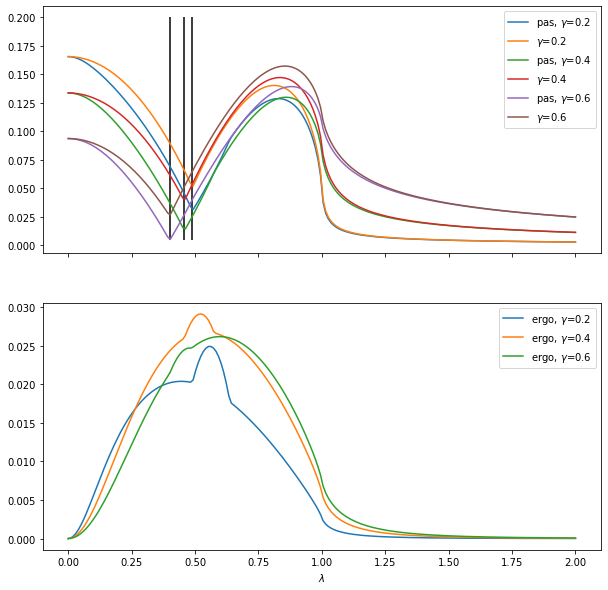

In [54]:
fig, axs = plt.subplots(2,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0,2,200)

for gs in [0.2,0.4,0.6]:
    dic,perm=get_dicts()
    rho_dic_theo={}
    for l in lambdarange:
        rho_dic_theo[l]=rho_2new(dic,perm,l,gs)
        
    energies_pass_theo=np.zeros_like(lambdarange)
    energies_subs_theo=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    

        
        eigval,eigstat=eigh(rho_dic_theo[l])

            
        qrho_2=q.Qobj(rho_dic_theo[l],dims=[[2, 2], [2, 2]])

        reduced_H_matr=Hamiltonian(l,gs)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]
            
        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
        ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]
        


        energies_pass_theo[j]=ener_pass
        energies_subs_theo[j]=ener_subs
                
    ergoarr=energies_subs_theo-energies_pass_theo
    
    axs[1].plot(lambdarange,ergoarr,label=r"ergo, $\gamma$={:.1f}".format(gs))
    axs[0].plot(lambdarange,energies_pass_theo,label=r"pas, $\gamma$={:.1f}".format(gs))
    axs[0].plot(lambdarange,energies_subs_theo,label=r"$\gamma$={:.1f}".format(gs))
    if gs<1:
        axs[0].vlines(np.sqrt(1-gs**2)/2,0.005,0.2,color="black")

    plt.xlabel(r"$\lambda$")
    axs[0].legend()
    axs[1].legend()
#plt.savefig("Ergotheo_2sites")

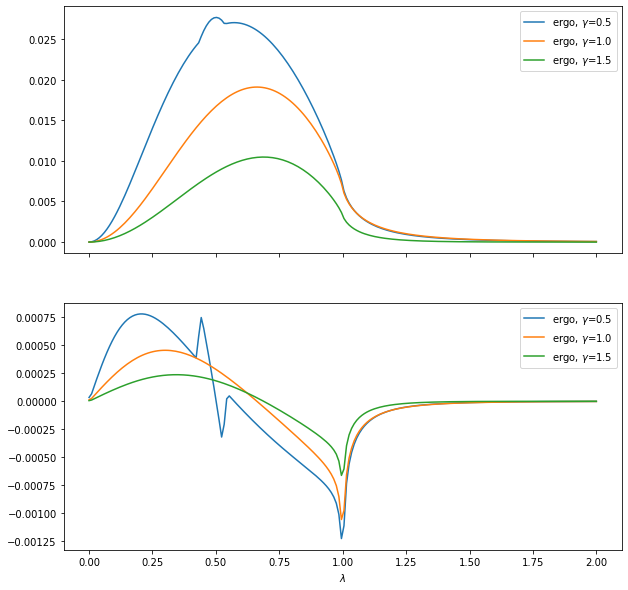

In [17]:
fig, axs = plt.subplots(2,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0,2,200)

for gs in [0.5,1,1.5]:
    dic,perm=get_dicts()
    rho_dic_theo={}
    for l in lambdarange:
        rho_dic_theo[l]=rho_2new(dic,perm,l,gs)
        
    energies_pass_theo=np.zeros_like(lambdarange)
    energies_subs_theo=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    

        
        eigval,eigstat=eigh(rho_dic_theo[l])
        
            
        qrho_2=q.Qobj(rho_dic_theo[l],dims=[[2, 2], [2, 2]])

        reduced_H_matr=Hamiltonian(l,gs)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]
            
        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
        ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]
        

        energies_pass_theo[j]=ener_pass
        energies_subs_theo[j]=ener_subs
        
 
    ergoarr=energies_subs_theo-energies_pass_theo
    
    axs[0].plot(lambdarange,ergoarr,label=r"ergo, $\gamma$={:.1f}".format(gs))
    axs[1].plot(lambdarange,np.gradient(ergoarr),label=r"ergo, $\gamma$={:.1f}".format(gs))
    #axs[1].plot(lambdarange,fixedergoarr,label=r"ergo, $\gamma$={:.1f}".format(gs))
    plt.xlabel(r"$\lambda$")
    axs[0].legend()
    axs[1].legend()
    #plt.savefig("Ergotheo_2sites")

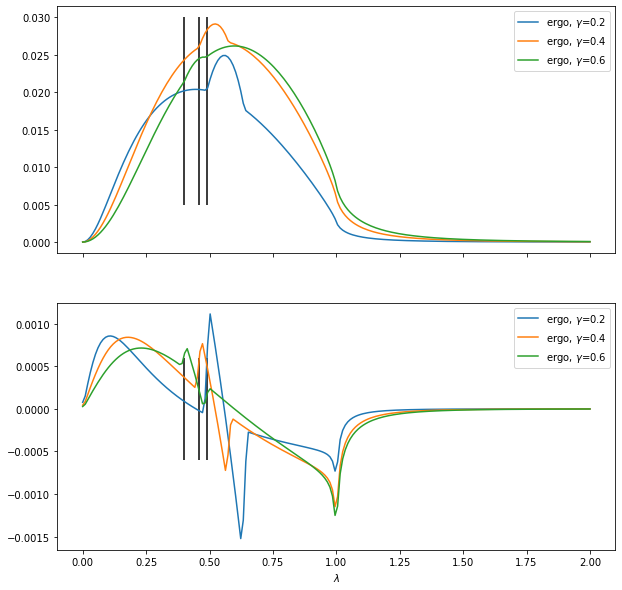

In [47]:
fig, axs = plt.subplots(2,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0,2,200)

for gs in [0.2,0.4,0.6]:
    dic,perm=get_dicts()
    rho_dic_theo={}
    for l in lambdarange:
        rho_dic_theo[l]=rho_2new(dic,perm,l,gs)
        
    energies_pass_theo=np.zeros_like(lambdarange)
    energies_subs_theo=np.zeros_like(lambdarange)

    for j,l in enumerate(lambdarange):    

        
        eigval,eigstat=eigh(rho_dic_theo[l])
            
        qrho_2=q.Qobj(rho_dic_theo[l],dims=[[2, 2], [2, 2]])

        reduced_H_matr=Hamiltonian(l,gs)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]
            
        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
        ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]
        

        energies_pass_theo[j]=ener_pass
        energies_subs_theo[j]=ener_subs
        
 
    ergoarr=energies_subs_theo-energies_pass_theo
    
    axs[0].plot(lambdarange,ergoarr,label=r"ergo, $\gamma$={:.1f}".format(gs))
    axs[0].vlines(np.sqrt(1-gs**2)/2,0.005,0.03,color="black")

    axs[1].plot(lambdarange,np.gradient(ergoarr),label=r"ergo, $\gamma$={:.1f}".format(gs))
    axs[1].vlines(np.sqrt(1-gs**2)/2,-0.0006,0.0006,color="black")

    #axs[1].plot(lambdarange,fixedergoarr,label=r"ergo, $\gamma$={:.1f}".format(gs))
    plt.xlabel(r"$\lambda$")
    axs[0].legend()
    axs[1].legend()
    #plt.savefig("Ergotheo_2sites")

il problema come sempre è la simmetrizzazione a mano che porta un fattore un mezzo, il campo di fattorizzazione è $\lambda_f=\sqrt{(1-\gamma^2)} / 2$.

Poi il bozzo arriva fino al punto in cui i livelli si incrociano nel calcolo degli autovalori.
Ma non capisco questo punto come si calcola teoricamente.

Nel caso con il campo magnetico esterno (a simmetria rotta) il bozzo non c'è, è un punto solo che corrisponde al campo di fattorizzazione teorico atteso $\lambda_f=\sqrt{(1-\gamma^2)} $ 

In [19]:
for gs in [0.2,0.4,0.6]:
    fact=np.sqrt(1-gs**2)
    print(fact,fact/2)


0.9797958971132712 0.4898979485566356
0.916515138991168 0.458257569495584
0.8 0.4


In [ ]:
fig, axs = plt.subplots(2,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0,2,500)

for gs in [0.5,1.0,1.5]:
    dic,perm=get_dicts()
    rho_dic_theo={}
    for l in lambdarange:
        rho_dic_theo[l]=rho_2new(dic,perm,l,gs)
        
    energies_pass_theo=[]
    energies_subs_theo=[]

    for j,l in enumerate(lambdarange):    

        
        eigval,eigstat=eigh(rho_dic_theo[l])

            
        qrho_2=q.Qobj(rho_dic_theo[l],dims=[[2, 2], [2, 2]])

        reduced_H_matr=Hamiltonian(l,gs)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]
            
        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
        ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]


        energies_pass_theo.append(ener_pass)
        energies_subs_theo.append(ener_subs)
        
    ergoarr=np.array(energies_subs_theo)-np.array(energies_pass_theo)

    axs[0].plot(lambdarange,ergoarr,label=r"$\gamma$={:.1f}".format(gs))
    axs[1].plot(lambdarange,energies_pass_theo,label=r"$\gamma$={:.1f}".format(gs))
    axs[1].plot(lambdarange,energies_subs_theo,label=r"$\gamma$={:.1f}".format(gs))
    plt.xlabel(r"$\lambda$")
    axs[0].legend()
    axs[1].legend()


In [ ]:


fig, axs = plt.subplots(1,sharex=True,figsize=[10,10])

lambdarange=np.linspace(0.99,1.01)
for gs in [0.5,1.0,1.5]:
    dic,perm=get_dicts()
    rho_dic_theo={}
    for l in lambdarange:
        rho_dic_theo[l]=rho_2new(dic,perm,l,gs)
        
    energies_pass_theo=[]
    energies_subs_theo=[]
    
    for j,l in enumerate(lambdarange):    


        eigval,eigstat=eigh(rho_dic_theo[l])

        qrho_2=q.Qobj(rho_dic_theo[l],dims=[[2, 2], [2, 2]])

        reduced_H_matr=Hamiltonian(l,gs)

        h_eigval, h_eigvec= reduced_H_matr.eigenstates()

        rho_pass=q.Qobj()

        sortdesc=np.sort(eigval)[::-1]
        for i in range(len(eigval)):    
            rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

        ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
        ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]


        energies_pass_theo.append(ener_pass)
        energies_subs_theo.append(ener_subs)

    ergoarr=np.array(energies_subs_theo)-np.array(energies_pass_theo)

    axs.plot(lambdarange,np.gradient(np.gradient(ergoarr)),label=r"$\gamma$={:.1f}".format(gs))
    plt.ylabel("Second-dev",fontsize=15)
    plt.xlabel(r"$\lambda$",fontsize=15)
plt.legend()


In [ ]:
def grounden(lamb,gamma=1):
    return (1/2)*(gfunc(-1,lamb,gamma)-2*lamb*gfunc(0,lamb,gamma))
def enerpass(l,g=1):
    return (-1/4)*(np.sqrt((gfunc(-1,l,g)-gfunc(1,l,g))**2+4*(gfunc(0,l,g))**2)*(np.sqrt(4*l**2+1))+gfunc(-1,l,g)+gfunc(1,l,g))

In [ ]:
lambdarange=np.linspace(0,2,500)

gs=1
dic,perm=get_dicts()
rho_dic_theo={}
for l in lambdarange:
    rho_dic_theo[l]=rho_2new(dic,perm,l,gs)

energies_pass_theo=[]
energies_subs_theo=[]

for j,l in enumerate(lambdarange):    


    eigval,eigstat=eigh(rho_dic_theo[l])


    qrho_2=q.Qobj(rho_dic_theo[l],dims=[[2, 2], [2, 2]])

    reduced_H_matr=Hamiltonian(l)/2

    h_eigval, h_eigvec= reduced_H_matr.eigenstates()

    rho_pass=q.Qobj()

    sortdesc=np.sort(eigval)[::-1]

    for i in range(len(eigval)):    
        rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])

    ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
    ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]


    energies_pass_theo.append(ener_pass)
    energies_subs_theo.append(ener_subs)

In [ ]:
groundenvec=np.zeros_like(lambdarange)
for i,l in enumerate(lambdarange):
    groundenvec[i]=grounden(l)+0.5* np.sqrt(1+4*l**2)
plt.figure(figsize=(20,10))

plt.plot(lambdarange,energies_subs_theo,label=r"$\gamma$={:.1f}".format(gs))
plt.plot(lambdarange,groundenvec)

plt.legend()

#siiii

In [ ]:
def trial(l,g=1):
    return (-1/4)*(np.sqrt((gfunc(-1,l,g)-gfunc(1,l,g))**2+4*(gfunc(0,l,g))**2)*(np.sqrt(4*l**2+1))-gfunc(-1,l,g)-gfunc(1,l,g))

In [ ]:
passenervec=np.zeros_like(lambdarange)
for i,l in enumerate(lambdarange):
    passenervec[i]=trial(l) + 0.5* np.sqrt(1+4*l**2)
plt.figure(figsize=(20,10))
plt.plot(lambdarange,energies_pass_theo,label=r"$\gamma$={:.1f}".format(gs))
plt.plot(lambdarange,passenervec)

In [ ]:
plt.plot(lambdarange,energies_subs_theo,label=r"$\gamma$={:.1f}".format(gs))
plt.plot(lambdarange,groundenvec)
plt.plot(lambdarange,energies_pass_theo,label=r"$\gamma$={:.1f}".format(gs))
plt.plot(lambdarange,passenervec)


In [ ]:
plt.plot(lambdarange,groundenvec-passenervec)
plt.show()
plt.plot(lambdarange,np.gradient(groundenvec-passenervec))
